In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import numpy as np
import matplotlib.pylab as plt
import plotly.express as ex
from sympy.plotting import plot_implicit

%matplotlib inline

In [10]:
from sympy import Symbol, symbols, diff,pprint,Function,solve,Derivative,Eq,latex,simplify
from sympy import sin,cos,sec,sqrt,tan,exp,log,Abs,acos, atan, pi
from fractions import Fraction

from IPython.display import HTML
def typeset():
  """MathJax initialization for the current cell.

  This installs and configures MathJax for the current output.
  """
  display(HTML('''
      <script src="https://www.gstatic.com/external_hosted/mathjax/latest/MathJax.js?config=TeX-AMS_HTML-full,Safe&delayStartupUntil=configured"></script>
      <script>
        (() => {
          const mathjax = window.MathJax;
          mathjax.Hub.Config({
          'tex2jax': {
            'inlineMath': [['$', '$'], ['\\(', '\\)']],
            'displayMath': [['$$', '$$'], ['\\[', '\\]']],
            'processEscapes': true,
            'processEnvironments': true,
            'skipTags': ['script', 'noscript', 'style', 'textarea', 'code'],
            'displayAlign': 'center',
          },
          'HTML-CSS': {
            'styles': {'.MathJax_Display': {'margin': 0}},
            'linebreaks': {'automatic': true},
            // Disable to prevent OTF font loading, which aren't part of our
            // distribution.
            'imageFont': null,
          },
          'messageStyle': 'none'
        });
        mathjax.Hub.Configured();
      })();
      </script>
      '''))

In [4]:
from IPython.display import display, Latex

In [5]:
x,t,u=symbols("x t u")
def ChainRuleLatex(f,g):
    u=Symbol("u")
    fu=diff(f,u)
    fx=diff(f,u).subs({u:g})
    gx=diff(g,x)
    fg=f.subs({u:g})

    s1=' \\begin{eqnarray} '
    s2=' &%s&& \\quad %s \\\ ' %(latex(g),latex(f))
    s3=' x& \Longrightarrow &u=g(x)=%s &\Longrightarrow  & f(g(x))=%s \\\ ' %(latex(g),latex(fg))
    s4=' &\color{red}{g\'}\downarrow& & \color{brown}{f\'}\downarrow \\\ '
    s5=' & \\left(\\color{red}{%s} \\right)&\\qquad\\times& \\left( \\color{brown}{%s} \\right)   \\\ ' %((latex(gx),latex(fg)))
    s6=' \end{eqnarray} '
    s=s1+s2+s3+s4+s5+s6

    display(Latex(s))

    display(Latex('i.e. the derivative of $f(g(x)), \mathbf{(f(g(x)))}\',$ is: '))

    display(simplify(gx*fx))


In [6]:
x,t,u,a,b=symbols("x t u a b")
def ChainRule3(f,g):
    u=Symbol("u")
    fu=diff(f,u)
    fx=diff(f,u).subs({u:g})
    gx=diff(g,x)
    fg=f.subs({u:g})
    print("   ",g,"\t",f,"\n", \
          "x","  ⟶  ",g,"   ⟶   ",fg, "\n",\
          "     ↓     ×       ↓", "\n",\
          "   ",gx,"\t",fu,"\n",\
          "           ↓    \n", \
          "     ", gx*fx
         )
    print("---\ni.e.\n")
    pprint(gx*fx)
    #print("(f(g(x)))' =",l1*l2,", \nwhere f(u) = ",f, " and u = g = ",g)

In [7]:
# 120
# 11
f=u**2
g=(x+5)/(x**2+2)


In [11]:
typeset()
ChainRuleLatex(f,g)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

2*(x + 5)*(x**2 - 2*x*(x + 5) + 2)/(x**2 + 2)**3

In [ ]:

f=u
g=(x+a)/(x**2+b)
ChainRuleLatex(f,g)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

(b + x**2 - 2*x*(a + x))/(b + x**2)**2

In [ ]:
# 16
diff(sin(2*x)*cos(2*x),x)

-2*sin(2*x)**2 + 2*cos(2*x)**2

In [ ]:
# 23
f=exp(u)
g=sqrt(x)

ChainRuleLatex(f,g)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

exp(sqrt(x))/(2*sqrt(x))

In [ ]:
# 37
diff(log(log(x**2)),x)

2/(x*log(x**2))

In [ ]:
#39
diff(log(sin(x)**2)/2,x)

cos(x)/sin(x)

In [ ]:
#40
simplify(diff(log((cos(x)/(cos(x)+1))**2)/2,x))

-sin(x)/(cos(x)**2 + cos(x))

#39, #40, we use the fact

$$ |f|=(f^2)^{1/2}$$
Howeve, we also have the differential ruke:
$$(\log |x|)'=\frac{1}{x}$$
thus,
-  #39, $(\log|\sin x|)'=\frac{(\sin(x))'}{\sin x}=\frac{\cos x}{\sin x}$;
- #40  
   $$\left(\log\left|\frac{\cos x}{1+\cos x}\right|\right)'=\frac{\left(\frac{\cos x}{1+\cos x}\right)'}{\frac{\cos x}{1+\cos x}}
   =\frac{\sin x}{\cos x}\left(\frac{\cos x}{1+\cos x} -1\right)$$

In [ ]:
f=(u/(1+u))
g=cos(x)

ChainRuleLatex(f,g)



<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

-sin(x)/(cos(x) + 1)**2

In [ ]:
# 44
from fractions import Fraction
f= u**Fraction(1,3)
g=(3*x**3+4*x)
ChainRuleLatex(f,g)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

(9*x**2 + 4)/(3*(x*(3*x**2 + 4))**(2/3))

In [ ]:
h= (3*x**3+4*x)**Fraction(1,3)
t0=2
y0=2
m=diff(h,x).subs({x:t0})
print("The tangent line of f(x) =%s at x = %s is (y-%s)=%s(x-%s)" %(h,t0,y0,m,t0))


The tangent line of f(x) =(3*x**3 + 4*x)**(1/3) at x = 2 is (y-2)=5*2**(2/3)/6(x-2)


In [ ]:
# 46
h= 26-(sec(4*x))**3
t0=0
y0=25
m=diff(h,x).subs({x:t0})
print("The tangent line of f(x) =%s at x = %s is (y-%s)=%s(x-%s)" %(h,t0,y0,m,t0))


The tangent line of f(x) =26 - sec(4*x)**3 at x = 0 is (y-25)=0(x-0)


In [ ]:
#54
diff(sin(x**2),x,2)

2*(-2*x**2*sin(x**2) + cos(x**2))

In [ ]:
#56
diff(4**x,x)

4**x*log(4)

In [ ]:
# 60
diff(log(1+x**2)/(2*log(5)),x)

x/((x**2 + 1)*log(5))

In [ ]:
# p 129


In [12]:
def ImplicitDiff(express):
    l=diff(express,x);
    print("y'(x) =",solve(l,Derivative(y,x))[0])
    print("\n===\n, i.e.\n")
    pprint(solve(l,Derivative(y,x))[0])

In [13]:
def ImplicitDiff_v2(f,x,y):
    pprint("(%s)'=0 " %f)
    pprint("\n⇒ (%s) + (%s) y' = 0" %(diff(f,x),diff(f,y)))
    pprint("   %s' = %s" %(y,simplify(-diff(f,x)/diff(f,y))))
    pprint("\n where  %s ≠ 0" %diff(f,y) )
    return simplify(-diff(f,x)/diff(f,y))

In [14]:
x,y,t,u=symbols("x y t u")



In [15]:
#7


sol=ImplicitDiff_v2(y-sin(x*y),x,y)

(y - sin(x*y))'=0 
                                          
⇒ (-y*cos(x*y)) + (-x*cos(x*y) + 1) y' = 0
   y' = -y*cos(x*y)/(x*cos(x*y) - 1)
                           
 where  -x*cos(x*y) + 1 ≠ 0


In [17]:
# 8
ImplicitDiff_v2(x**2-3*log(y)+y**2-10,x,y)

(x**2 + y**2 - 3*log(y) - 10)'=0 
                            
⇒ (2*x) + (2*y - 3/y) y' = 0
   y' = -2*x*y/(2*y**2 - 3)
                     
 where  2*y - 3/y ≠ 0


-2*x*y/(2*y**2 - 3)

In [18]:
#15
ImplicitDiff_v2(3*exp(x*y)-x,x,y)

(-x + 3*exp(x*y))'=0 
                                            
⇒ (3*y*exp(x*y) - 1) + (3*x*exp(x*y)) y' = 0
   y' = -y/x + exp(-x*y)/(3*x)
                        
 where  3*x*exp(x*y) ≠ 0


-y/x + exp(-x*y)/(3*x)

In [19]:
def tangetline(express,x0,y0):
    l=diff(express,x);
    m=(solve(l,Derivative(y,x))[0]).subs({x:x0,y:y0})
    print("The tangent line of %s=0 at (x,y)=(%s,%s) is \n (y-%s)=%s(x-%s)" %(express,x0,y0,y0,m,x0))


In [20]:
x, y = symbols('x y')
def ImplicitPlot(express):
    eq = Eq(express)
    plot_implicit(eq)

$$x=a e^{b xy}$$

In [21]:
fxy=b*exp(a*x*y)-x
y=Function("y")
y=y(x)
tangetline(b*exp(a*x*y)-x,b,0)

The tangent line of b*exp(a*x*y(x)) - x=0 at (x,y)=(b,0) is 
 (y-0)=1/(a*b**2)(x-b)


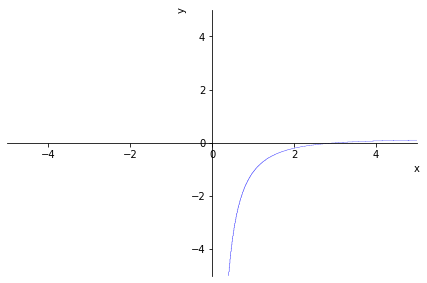

In [ ]:
x, y = symbols('x y')

ImplicitPlot(3*exp(x*y)-x)

In [22]:
#27

y=Function("y")
y=y(x)
tangetline(x**2+x*y+y**2-4,2,0)

The tangent line of x**2 + x*y(x) + y(x)**2 - 4=0 at (x,y)=(2,0) is 
 (y-0)=-2(x-2)


In [23]:
x,y=symbols("x y")
ImplicitDiff_v2(x-b*exp(a*x*y),x,y)

(-b*exp(a*x*y) + x)'=0 
                                                      
⇒ (-a*b*y*exp(a*x*y) + 1) + (-a*b*x*exp(a*x*y)) y' = 0
   y' = -y/x + exp(-a*x*y)/(a*b*x)
                             
 where  -a*b*x*exp(a*x*y) ≠ 0


-y/x + exp(-a*x*y)/(a*b*x)

In [ ]:
# 35

ImplicitDiff_v2(x*y-1-2*x-y**2,x,y)

(x*y - 2*x - y**2 - 1)'=0 
                            
⇒ (y - 2) + (x - 2*y) y' = 0
   y' = (2 - y)/(x - 2*y)
                   
 where  x - 2*y ≠ 0


(2 - y)/(x - 2*y)

In [ ]:
#36
r,c=symbols("r c")
fxy=x**2+y**2-r**2
y=Function("y")
y=y(x)
x0=c
y0=sqrt(r**2-c**2)
tangetline(3*exp(x*y)-x,x0,y0)

The tangent line of -x + 3*exp(x*y(x))=0 at (x,y)=(c,sqrt(-c**2 + r**2)) is 
 (y-sqrt(-c**2 + r**2))=-sqrt(-c**2 + r**2)/c + exp(-c*sqrt(-c**2 + r**2))/(3*c)(x-c)


Since the mulipcation of slopes of normal line and tangent passing same point is -1,

In [ ]:
def normaline(express,x0,y0):
    l=diff(express,x);
    m=(solve(l,Derivative(y,x))[0]).subs({x:x0,y:y0})
    eq=-simplify(y-y0+(x-x0)/m)
    print("The normal line of %s=0 at (x,y)=(%s,%s) is \n %s=0" %(express,x0,y0,eq))
    print("---\n i.e.\n 0=")

    pprint(eq)

In [ ]:
normaline(fxy,x0,y0)

The normal line of -r**2 + x**2 + y(x)**2=0 at (x,y)=(c,sqrt(-c**2 + r**2)) is 
 -y(x) + x*sqrt(-c**2 + r**2)/c=0
---
 i.e.
 0=
             ___________
            ╱    2    2 
        x⋅╲╱  - c  + r  
-y(x) + ────────────────
               c        


In [ ]:
##41
diff(x*(x-1)**Fraction(3,2)/sqrt(x+1),x)

-x*(x - 1)**(3/2)/(2*(x + 1)**(3/2)) + 3*x*sqrt(x - 1)/(2*sqrt(x + 1)) + (x - 1)**(3/2)/sqrt(x + 1)

In [ ]:
#44
diff((x-2)**(x+1),x)

(x - 2)**(x + 1)*(log(x - 2) + (x + 1)/(x - 2))

In [ ]:
#50
r,c,k=symbols("r c k")

fxy=sqrt(x)+sqrt(y)-sqrt(c)
y=Function("y")
y=y(x)
x0=k
y0=(sqrt(c)-sqrt(x0))**2

tangetline(sqrt(x)+sqrt(y)-sqrt(c),x0,y0)

The tangent line of -sqrt(c) + sqrt(x) + sqrt(y(x))=0 at (x,y)=(k,(sqrt(c) - sqrt(k))**2) is 
 (y-(sqrt(c) - sqrt(k))**2)=-sqrt((sqrt(c) - sqrt(k))**2)/sqrt(k)(x-k)


From above, the sum of $x$-intercept and $y$-intercept is:
    $$\left[k+ (\sqrt c - \sqrt k)\sqrt k\right]+\left[(\sqrt c - \sqrt k)^2+\sqrt k(\sqrt c - \sqrt k)\right]=c$$

2-6 Derivatives of Inverse Functions
---
$$\frac{d x}{d y}=\frac{1}{dy/dx}$$

In [ ]:
#14
x,y,t=symbols("x y t")
diff(sin(acos(t)),t)

-t/sqrt(1 - t**2)

In [ ]:
#41
expr=x*x+x*atan(y)-y+1
sol=ImplicitDiff_v2(expr,x,y)

(x**2 + x*atan(y) - y + 1)'=0 
                                             
⇒ (2*x + atan(y)) + (x/(y**2 + 1) - 1) y' = 0
   y' = (2*x + atan(y))*(y**2 + 1)/(-x + y**2 + 1)
                            
 where  x/(y**2 + 1) - 1 ≠ 0


In [ ]:
sol

(2*x + atan(y))*(y**2 + 1)/(-x + y**2 + 1)

In [ ]:
y=Function("y")
y=y(x)
expr=x*x+x*atan(y)-y+1

tangetline(expr,-pi/4,1)

The tangent line of x**2 + x*atan(y(x)) - y(x) + 1=0 at (x,y)=(-pi/4,1) is 
 (y-1)=-pi/(2*(pi/4 + 2))(x--pi/4)
